In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle 

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from collections import defaultdict

In [3]:
import os
import sys
sys.path.insert(0, "..")

from methods.kt import CoinBettingCI, HorseRaceCI
from methods.lbup import LowerBoundStockInvestmentCI
from methods.up import StockInvestmentCI
from methods.hybrid import HybridCI
from methods.precise_co96 import PRECiSE_CO96
from methods.precise_a_co96 import PRECiSE_A_CO96
from methods.precise_r70 import PRECiSE_R70

In [4]:
def generate_bernoulli(t, p, seed=0):
    np.random.seed(seed)
    return (np.random.uniform(size=t) <= p).astype(int)

In [5]:
def generate_beta(t, betas, seed=0):
    np.random.seed(seed)
    return np.random.beta(*betas, size=t)

In [6]:
def generate_unif(t, seed=0):
    np.random.seed(seed)
    return np.random.rand(t)

# Experiments

In [7]:
line_configs = dict()
line_configs['CB'] = dict(c='brown', ls='solid', marker='x')
line_configs['HR'] = dict(c='m', ls='solid', marker='o')

line_configs['PRECiSE_CO96'] = dict(c='tab:pink', ls=(0, (3, 1, 1, 1)), marker='^')
line_configs['PRECiSE_A_CO96'] = dict(c='tab:green', ls=(0, (3, 1, 1, 1)), marker='^')
line_configs['PRECiSE_R70'] = dict(c='tab:blue', ls=(0, (3, 1, 1, 1)), marker='^')
line_configs['UP'] = dict(c='black', ls='-.', marker='D')

line_configs['LBUP1'] = dict(c='orange', ls='dotted', marker='+')
line_configs['LBUP2'] = dict(c='purple', ls='dotted', marker='+')
line_configs['LBUP3'] = dict(c='red', ls='dotted', marker='+')

line_configs['HybridUP1,50'] = dict(c='green', ls='--', marker='s', markersize=5)
line_configs['HybridUP2,50'] = dict(c='orange', ls='--', marker='s', markersize=5)
line_configs['HybridUP3,50'] = dict(c='blue', ls='--', marker='s', markersize=5)

for key in line_configs:
    line_configs[key]['markevery'] = 0.1


labels = dict()
labels['CB'] = 'CB'
labels['HR'] = 'HR'

labels['PRECiSE_CO96'] = 'PRECiSE_CO96'
labels['PRECiSE_A_CO96'] = 'PRECiSE_A_CO96'
labels['PRECiSE_R70'] = 'PRECiSE_R70'
labels['UP'] = 'UP'

labels['LBUP1'] = r'LBUP ($n$=1)'
labels['LBUP2'] = r'LBUP ($n$=2)'
labels['LBUP3'] = r'LBUP ($n$=3)'

labels['HybridUP1,50'] = r'HybridUP ($n$=1)' #',$t_{\mathsf{UP}}=50$)'
labels['HybridUP2,50'] = r'HybridUP ($n$=2)'
labels['HybridUP3,50'] = r'HybridUP ($n$=3)'


In [8]:
wor = False

t = 10 ** 4
ts = np.arange(1, t + 1)

delta = 0.05
seeds = range(5)

tcut = 10 ** 4
tup = 50

In [9]:
import _pickle as cPickle

In [74]:
upper_ci.keys()

dict_keys(['CB', 'HR', 'PRECiSE_CO96', 'PRECiSE_A_CO96', 'PRECiSE_R70', 'UP', 'LBUP1', 'LBUP2', 'LBUP3', 'HybridUP1,50', 'HybridUP2,50', 'HybridUP3,50'])

In [100]:
alg_sets = {1:[
    'UP', 
    'CB', 
    'HR', 
    'PRECiSE_CO96', 
#     'PRECiSE_A_CO96', 
    'PRECiSE_R70', 
    'LBUP1', 'LBUP2', 'LBUP3',],
            2: [
#     'CB', 'HR', 
    'UP', 
    'PRECiSE_CO96', 
    'PRECiSE_A_CO96', 
#     'PRECiSE_R70', 
    'LBUP1', 'LBUP2', 'LBUP3', 
    'HybridUP1,50', 'HybridUP2,50', 'HybridUP3,50',
               ]}

In [102]:
tstart = 0

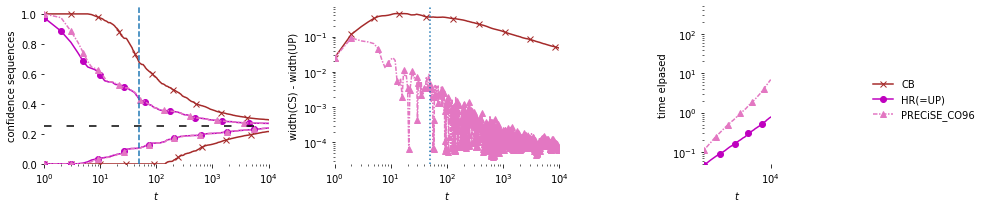

HR: 0.6867562900865605
PRECiSE_CO96: 1.2370808857767446
PRECiSE_A_CO96: 1.0461059070136896


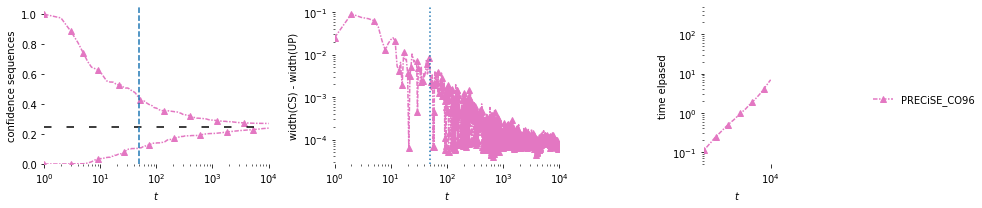

HR: 0.6867562900865605
PRECiSE_CO96: 1.2370808857767446
PRECiSE_A_CO96: 1.0461059070136896


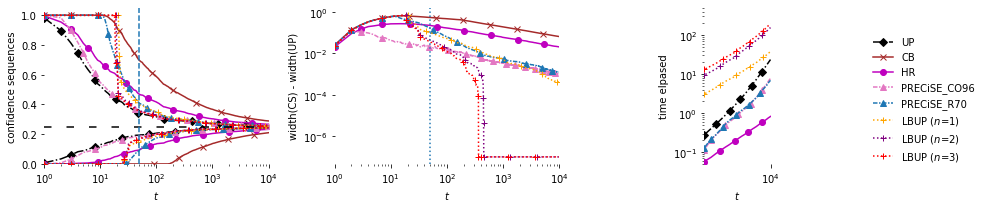

HR: 0.6924951667446748
PRECiSE_CO96: 1.2658581717669528
PRECiSE_A_CO96: 1.0010426250629467
PRECiSE_R70: 1.1000009034163047
UP: 1.4182044845951154
LBUP1: 0.7344908536258228
LBUP2: 0.8693211506824353
LBUP3: 0.8547808010976535
HybridUP1,50: 0.7500446987183815
HybridUP2,50: 0.8528365916309568
HybridUP3,50: 0.8599541285352693


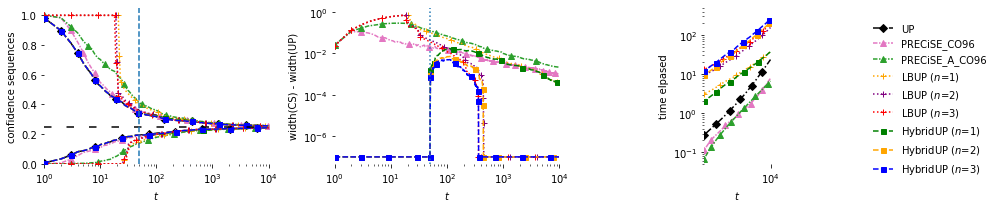

HR: 0.6924951667446748
PRECiSE_CO96: 1.2658581717669528
PRECiSE_A_CO96: 1.0010426250629467
PRECiSE_R70: 1.1000009034163047
UP: 1.4182044845951154
LBUP1: 0.7344908536258228
LBUP2: 0.8693211506824353
LBUP3: 0.8547808010976535
HybridUP1,50: 0.7500446987183815
HybridUP2,50: 0.8528365916309568
HybridUP3,50: 0.8599541285352693


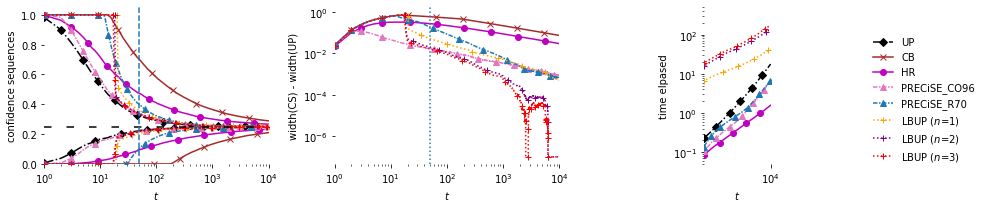

HR: 0.809421569325955
PRECiSE_CO96: 1.444371868641698
PRECiSE_A_CO96: 1.0103664431010635
PRECiSE_R70: 1.3579946146837725
UP: 1.32305811846078
LBUP1: 0.7061242184945469
LBUP2: 0.7753436118750521
LBUP3: 0.8043126237308791
HybridUP1,50: 0.8145567085915941
HybridUP2,50: 0.7815981597572413
HybridUP3,50: 0.794135020569503


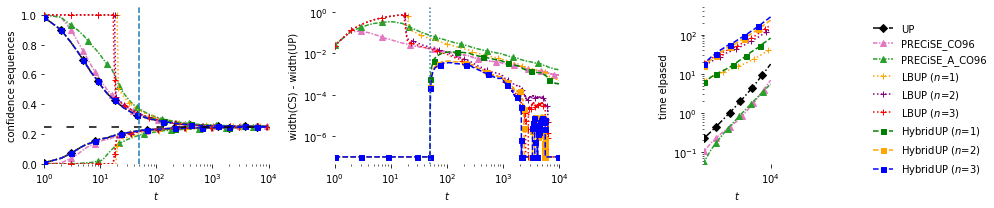

HR: 0.809421569325955
PRECiSE_CO96: 1.444371868641698
PRECiSE_A_CO96: 1.0103664431010635
PRECiSE_R70: 1.3579946146837725
UP: 1.32305811846078
LBUP1: 0.7061242184945469
LBUP2: 0.7753436118750521
LBUP3: 0.8043126237308791
HybridUP1,50: 0.8145567085915941
HybridUP2,50: 0.7815981597572413
HybridUP3,50: 0.794135020569503


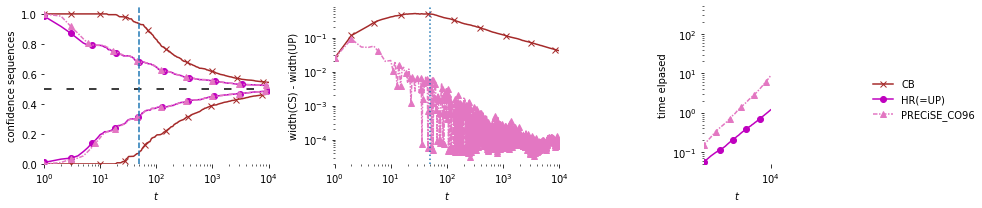

HR: 0.8525500933914822
PRECiSE_CO96: 1.2967519492011506
PRECiSE_A_CO96: 0.9998179283938514


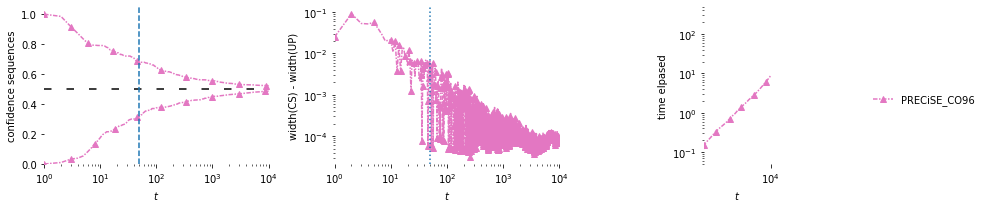

HR: 0.8525500933914822
PRECiSE_CO96: 1.2967519492011506
PRECiSE_A_CO96: 0.9998179283938514


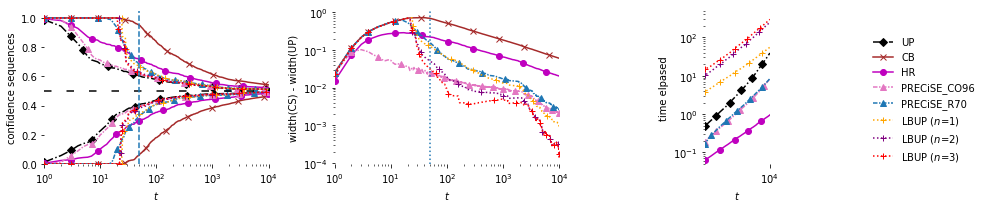

HR: 0.8207203981832567
PRECiSE_CO96: 1.4637305310926059
PRECiSE_A_CO96: 0.988555724192414
PRECiSE_R70: 1.2703806617224827
UP: 1.4697967271238104
LBUP1: 0.871648642777718
LBUP2: 1.0793784200387093
LBUP3: 0.9848810986792389
HybridUP1,50: 0.8733124593153809
HybridUP2,50: 1.0536245556930395
HybridUP3,50: 1.0277059200997276


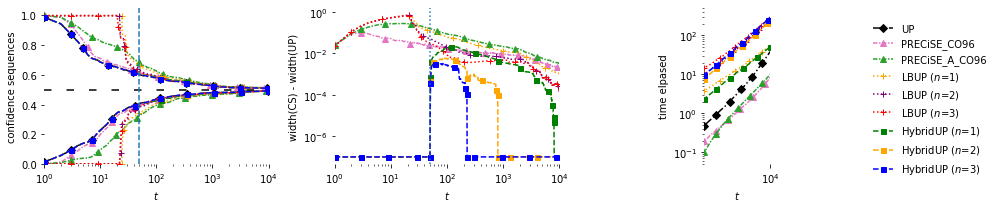

HR: 0.8207203981832567
PRECiSE_CO96: 1.4637305310926059
PRECiSE_A_CO96: 0.988555724192414
PRECiSE_R70: 1.2703806617224827
UP: 1.4697967271238104
LBUP1: 0.871648642777718
LBUP2: 1.0793784200387093
LBUP3: 0.9848810986792389
HybridUP1,50: 0.8733124593153809
HybridUP2,50: 1.0536245556930395
HybridUP3,50: 1.0277059200997276


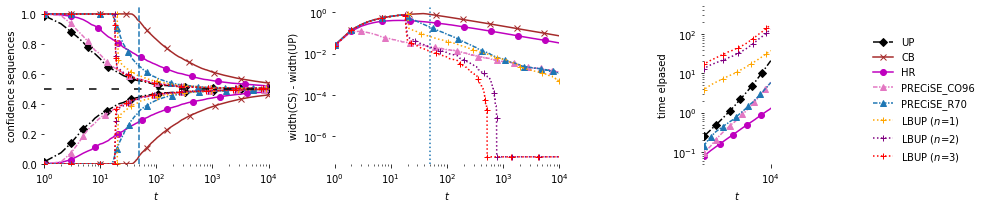

HR: 0.7521260568989818
PRECiSE_CO96: 1.1388665573177434
PRECiSE_A_CO96: 1.0014710642365392
PRECiSE_R70: 1.0535491788764102
UP: 1.3722984353821046
LBUP1: 0.7156954081611479
LBUP2: 0.9023007977184531
LBUP3: 0.8636922294539134
HybridUP1,50: 0.7331000090194125
HybridUP2,50: 0.8459101775342935
HybridUP3,50: 0.8330206969802154


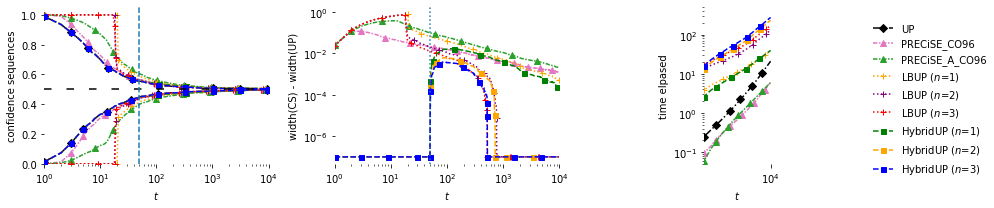

HR: 0.7521260568989818
PRECiSE_CO96: 1.1388665573177434
PRECiSE_A_CO96: 1.0014710642365392
PRECiSE_R70: 1.0535491788764102
UP: 1.3722984353821046
LBUP1: 0.7156954081611479
LBUP2: 0.9023007977184531
LBUP3: 0.8636922294539134
HybridUP1,50: 0.7331000090194125
HybridUP2,50: 0.8459101775342935
HybridUP3,50: 0.8330206969802154


In [110]:
for kwd in ['bern0.25', 'beta1,3', 'beta10,30',
            'bern0.5', 'beta1,1', 'beta10,10',
             ]:  # paper
    # kwd = 'bern0.01'
    # kwd = 'unif'
    if kwd == 'bern0.01':
        mu = 0.01; title = 'Bern(0.01)'
    if kwd == 'bern0.25':
        mu = 0.25; title = 'Bern(0.25)'
    if kwd == 'beta1,3':
        mu = 0.25; title = 'Beta(1,3)'
    if kwd == 'beta10,30':
        mu = 0.25; title = 'Beta(10,30)'    

    if kwd == 'bern0.5':
        mu = 0.5; title = 'Bern(0.5)'
    if kwd == 'beta1,1':
        mu = 0.5; title = 'Beta(1,1)'
    if kwd == 'beta10,10':
        mu = 0.5; title = 'Beta(10,10)'        
    if kwd == 'unif':
        mu = 0.5; title = 'Unif'

    if not os.path.exists('exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor))):
        lower_ci = defaultdict(lambda: np.zeros((len(seeds), t)))
        upper_ci = defaultdict(lambda: np.zeros((len(seeds), t)))
        telapsed = defaultdict(lambda: np.zeros((len(seeds), t // 100)))
        
        for j, seed in enumerate(seeds):
            np.random.seed(seed)
            if kwd == 'bern0.01':
                xs = generate_bernoulli(t, p=0.01, seed=seed); mu = 0.01; title = 'Bern(0.01)'
            if kwd == 'bern0.25':
                xs = generate_bernoulli(t, p=0.25, seed=seed); mu = 0.25; title = 'Bern(0.25)'
            if kwd == 'beta1,3':
                xs = generate_beta(t, betas=[1, 3], seed=seed); mu = 0.25; title = 'Beta(1,3)'
            if kwd == 'beta10,30':
                xs = generate_beta(t, betas=[10, 30], seed=seed); mu = 0.25; title = 'Beta(10,30)'    

            if kwd == 'bern0.5':
                xs = generate_bernoulli(t, p=0.5, seed=seed); mu = 0.5; title = 'Bern(0.5)'
            if kwd == 'beta1,1':
                xs = generate_beta(t, betas=[1, 1], seed=seed); mu = 0.5; title = 'Beta(1,1)'
            if kwd == 'beta10,10':
                xs = generate_beta(t, betas=[10, 10], seed=seed); mu = 0.5; title = 'Beta(10,10)'        
            if kwd == 'unif':
                xs = generate_unif(t, seed=seed); mu = 0.5; title = 'Unif'
                
            print("Seed {}: Naive coin betting...".format(seed))
            lower_ci['CB'][j], upper_ci['CB'][j] = CoinBettingCI().construct(delta, xs[:tcut], wor=wor)

            print("Seed {}: Horse race...".format(seed))
            lower_ci['HR'][j], upper_ci['HR'][j], telapsed['HR'][j] = HorseRaceCI().construct(delta, xs[:tcut], wor=wor)

            print("Seed {}: PRECiSE_CO96...".format(seed))
            lower_ci['PRECiSE_CO96'][j], upper_ci['PRECiSE_CO96'][j], telapsed['PRECiSE_CO96'][j] = PRECiSE_CO96().construct(delta, xs[:tcut], wor=wor)

            print("Seed {}: PRECiSE_A_CO96...".format(seed))
            lower_ci['PRECiSE_A_CO96'][j], upper_ci['PRECiSE_A_CO96'][j], telapsed['PRECiSE_A_CO96'][j] = PRECiSE_A_CO96().construct(delta, xs[:tcut], wor=wor)

            if 'bern' not in kwd:
                print("Seed {}: PRECiSE_R70...".format(seed))
                lower_ci['PRECiSE_R70'][j], upper_ci['PRECiSE_R70'][j], telapsed['PRECiSE_R70'][j] = PRECiSE_R70().construct(delta, xs[:tcut], wor=wor)

                print("Seed {}: UP...".format(seed))
                lower_ci['UP'][j], upper_ci['UP'][j], telapsed['UP'][j], *_ = StockInvestmentCI().construct(delta, xs[:tcut], wor=wor)

                print("Seed {}: LBUP...".format(seed))
                lower_ci['LBUP1'][j], upper_ci['LBUP1'][j], telapsed['LBUP1'][j] = LowerBoundStockInvestmentCI(n=1).construct(delta, xs[:tcut], wor=wor, eps=1e-3)
                lower_ci['LBUP2'][j], upper_ci['LBUP2'][j], telapsed['LBUP2'][j] = LowerBoundStockInvestmentCI(n=2).construct(delta, xs[:tcut], wor=wor, eps=1e-3)
                lower_ci['LBUP3'][j], upper_ci['LBUP3'][j], telapsed['LBUP3'][j] = LowerBoundStockInvestmentCI(n=3).construct(delta, xs[:tcut], wor=wor, eps=1e-3)

                print("Seed {}: HybridUP...".format(seed))
                lower_ci['HybridUP1,{}'.format(tup)][j], upper_ci['HybridUP1,{}'.format(tup)][j], telapsed['HybridUP1,{}'.format(tup)][j] = HybridCI(n=1, tup=tup).construct(delta, xs[:tcut], wor=wor)
                lower_ci['HybridUP2,{}'.format(tup)][j], upper_ci['HybridUP2,{}'.format(tup)][j], telapsed['HybridUP2,{}'.format(tup)][j] = HybridCI(n=2, tup=tup).construct(delta, xs[:tcut], wor=wor)
                lower_ci['HybridUP3,{}'.format(tup)][j], upper_ci['HybridUP3,{}'.format(tup)][j], telapsed['HybridUP3,{}'.format(tup)][j] = HybridCI(n=3, tup=tup).construct(delta, xs[:tcut], wor=wor)

        with open('exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor)), 'wb') as f:
            pickle.dump(dict(lower_ci), f)
        with open('exp-results/{}_wor{}_upper_ci.pkl'.format(kwd, int(wor)), 'wb') as f:
            pickle.dump(dict(upper_ci), f)
        with open('exp-results/{}_wor{}_telapsed.pkl'.format(kwd, int(wor)), 'wb') as f:
            pickle.dump(dict(telapsed), f)

    else:
        print("Warning: {} already exists!".format('exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor))))
        with open(r'exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor)), "rb") as f:
            lower_ci = cPickle.load(f)
        with open(r'exp-results/{}_wor{}_upper_ci.pkl'.format(kwd, int(wor)), "rb") as f:
            upper_ci = cPickle.load(f)
        with open(r'exp-results/{}_wor{}_telapsed.pkl'.format(kwd, int(wor)), "rb") as f:
            telapsed = cPickle.load(f)

    upper_ci['PRECiSE_A_CO96'] = np.maximum(upper_ci['PRECiSE_A_CO96'], upper_ci['PRECiSE_CO96'])
    lower_ci['PRECiSE_A_CO96'] = np.minimum(lower_ci['PRECiSE_A_CO96'], lower_ci['PRECiSE_CO96'])
    
    # plot
    for set_id in alg_sets:
        alg_set = alg_sets[set_id]
        sizes = dict()
        for key in upper_ci:
            sizes[key] = (upper_ci[key][:tcut] - lower_ci[key][:tcut]).mean(axis=0)

        up_key = 'UP' if 'bern' not in kwd else 'HR'
        for key in upper_ci:
            if key != up_key:
                sizes[key] = np.maximum(1e-7, sizes[key] - sizes[up_key])

        fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))

        # 1) plot confidence sequences
        ax = axes[0]
        for key in alg_set:
            if key in upper_ci:
                if key == 'PRECiSE_A_CO96' and 'bern' in kwd:
                    pass
                else:
                    ax.plot(ts[tstart:], lower_ci[key].mean(axis=0)[tstart:], **line_configs[key], 
                            label='HR(=UP)' if key == 'HR' and 'bern' in kwd else labels[key])
                    ax.plot(ts[tstart:], upper_ci[key].mean(axis=0)[tstart:], **line_configs[key])

        # etc
        ax.axhline(y=mu, c='k', linestyle=(0, (5, 10)))
        ax.axvline(x=tup, linestyle='dashed')
        ax.set_xscale('log')
        # ax.set_ylim([0.24, 0.26])
        # ax.set_ylim([0.2, 0.3])
        ax.set_ylim([0, 1.05])
        ax.set_xlim([1, t])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        ax.set_xlabel(r'$t$')
        ax.set_ylabel('confidence sequences')
    #     ax.set_title(title)

        # 2) plot relative confidence sequence sizes compared to UP
        ax = axes[1]
        for key in alg_set:
            if key in upper_ci:
                if key != up_key:
    #             if 'Hybrid' not in key:
    #             if 'UP' in key:
                    if key == 'PRECiSE_A_CO96' and 'bern' in kwd:
                        pass
                    else:
                        ax.plot(ts[tstart:tcut], sizes[key][tstart:], **line_configs[key], label=labels[key])

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.axvline(x=50, linestyle='dotted')
        # ax.set_ylim([-0.005, 1.01])
        ax.set_xlim([1, t])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        ax.set_xlabel(r'$t$')
        ax.set_ylabel('width(CS) - width(UP)')
    #     ax.set_title(title)

        # 3) plot time elapsed
        ax = axes[2]

        every = 100
        tlogs = np.arange(every, t + every, every)

        for key in alg_set:
            if key in telapsed:
    #         if 'Hybrid' not in key:
    #         if 'UP' in key:
                if key == 'PRECiSE_A_CO96' and 'bern' in kwd:
                    pass
                else:
                    ax.plot(tlogs, telapsed[key].mean(axis=0).cumsum(), **line_configs[key], label=labels[key])

    #     ax.axis('scaled')
        ax.set_aspect('equal')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(xmin=2 * every, xmax=t)
        ax.set_ylim([5e-2, 5e2])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        ax.set_xlabel(r'$t$')
        ax.set_ylabel('time elpased')
    #     ax.set_title(title)

        # show legends
        handles, labels_ = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels_, 
                   loc='center left', 
                   bbox_to_anchor=(1., .5),
                   ncol=1,
        #            borderpad=2.5,
                   frameon=False)
        fig.tight_layout()
        # fig.subplots_adjust(left=0, wspace=0.3) 
        fig.savefig(f'figs/ex_{kwd}_set{set_id}.pdf', bbox_inches='tight')

        plt.show()

        for key in telapsed:
            cumt = telapsed[key].mean(axis=0).cumsum()
            print(key, end=': ')
            coeffs = []
            for j in range(1, 11):
                coeffs.append((np.log(cumt[-j] - cumt[0]) - np.log(cumt[-j-1] - cumt[0])) / (np.log(tlogs[-j] - tlogs[0]) - np.log(tlogs[-j-1] - tlogs[0])))
            print(np.mean(coeffs))